In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [84]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


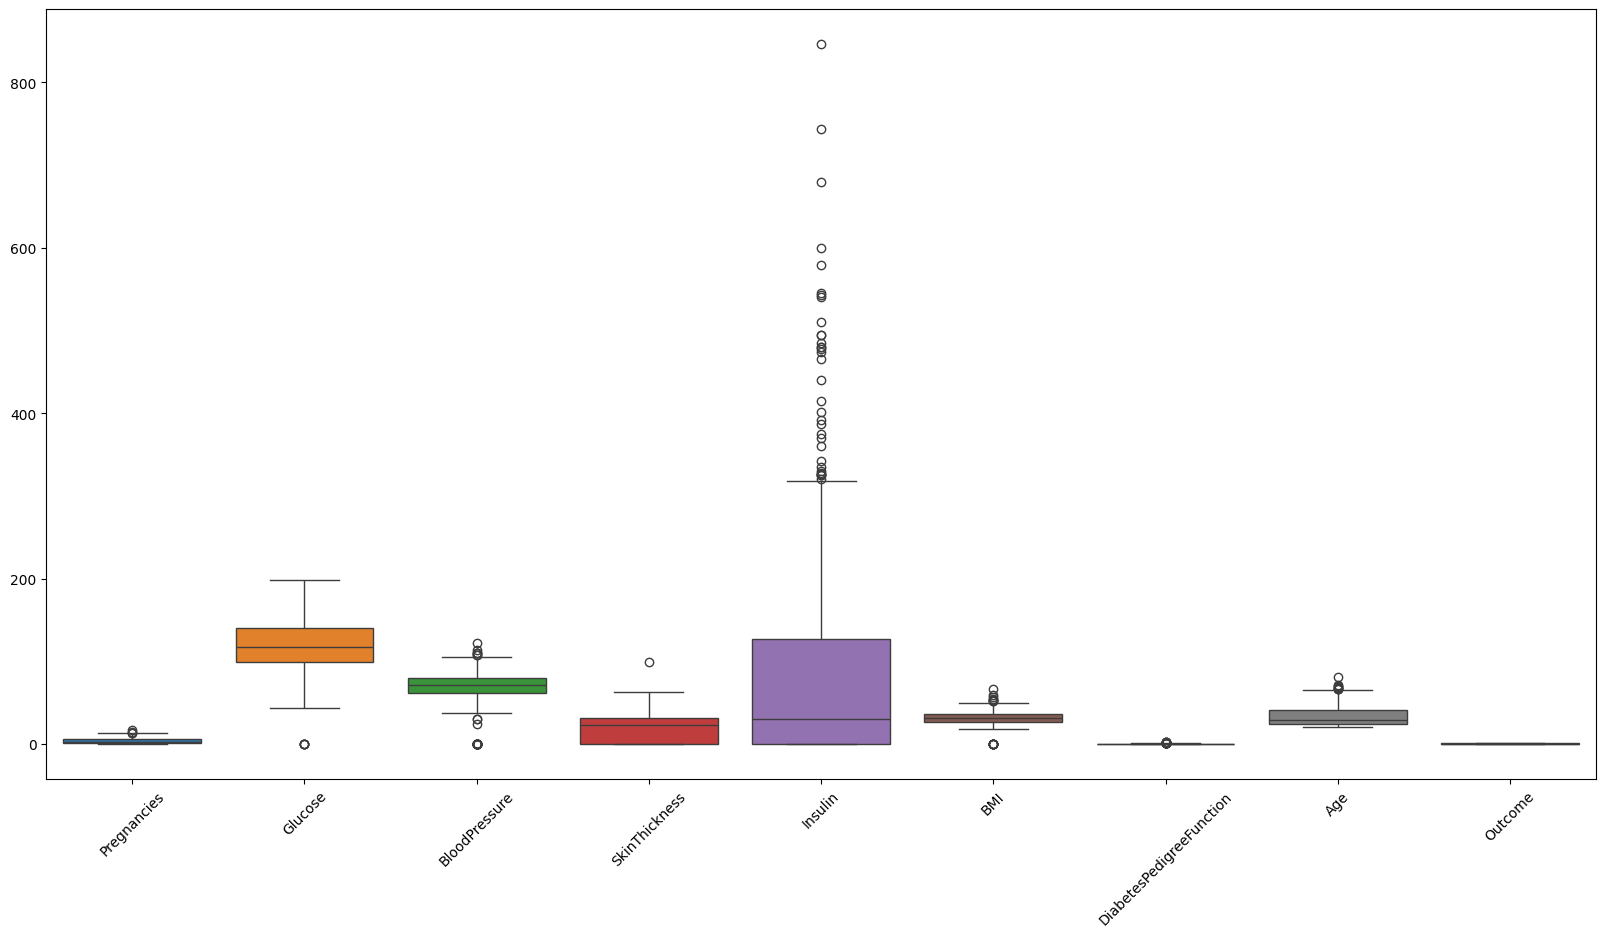

In [85]:
# Plotting box plots for each column
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [86]:
df = df.copy()


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


for col in columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
        print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")


Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 5
Number of outliers in BloodPressure: 45
Number of outliers in SkinThickness: 1
Number of outliers in Insulin: 34
Number of outliers in BMI: 19
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9


In [87]:
outlier_columns = [col + '_outlier' for col in columns if col + '_outlier' in df.columns]
df_cleaned = df[~df[outlier_columns].any(axis=1)]


df_cleaned = df_cleaned.drop(columns=outlier_columns)

print("Number of rows after removing outliers:", df_cleaned.shape[0])

Number of rows after removing outliers: 639


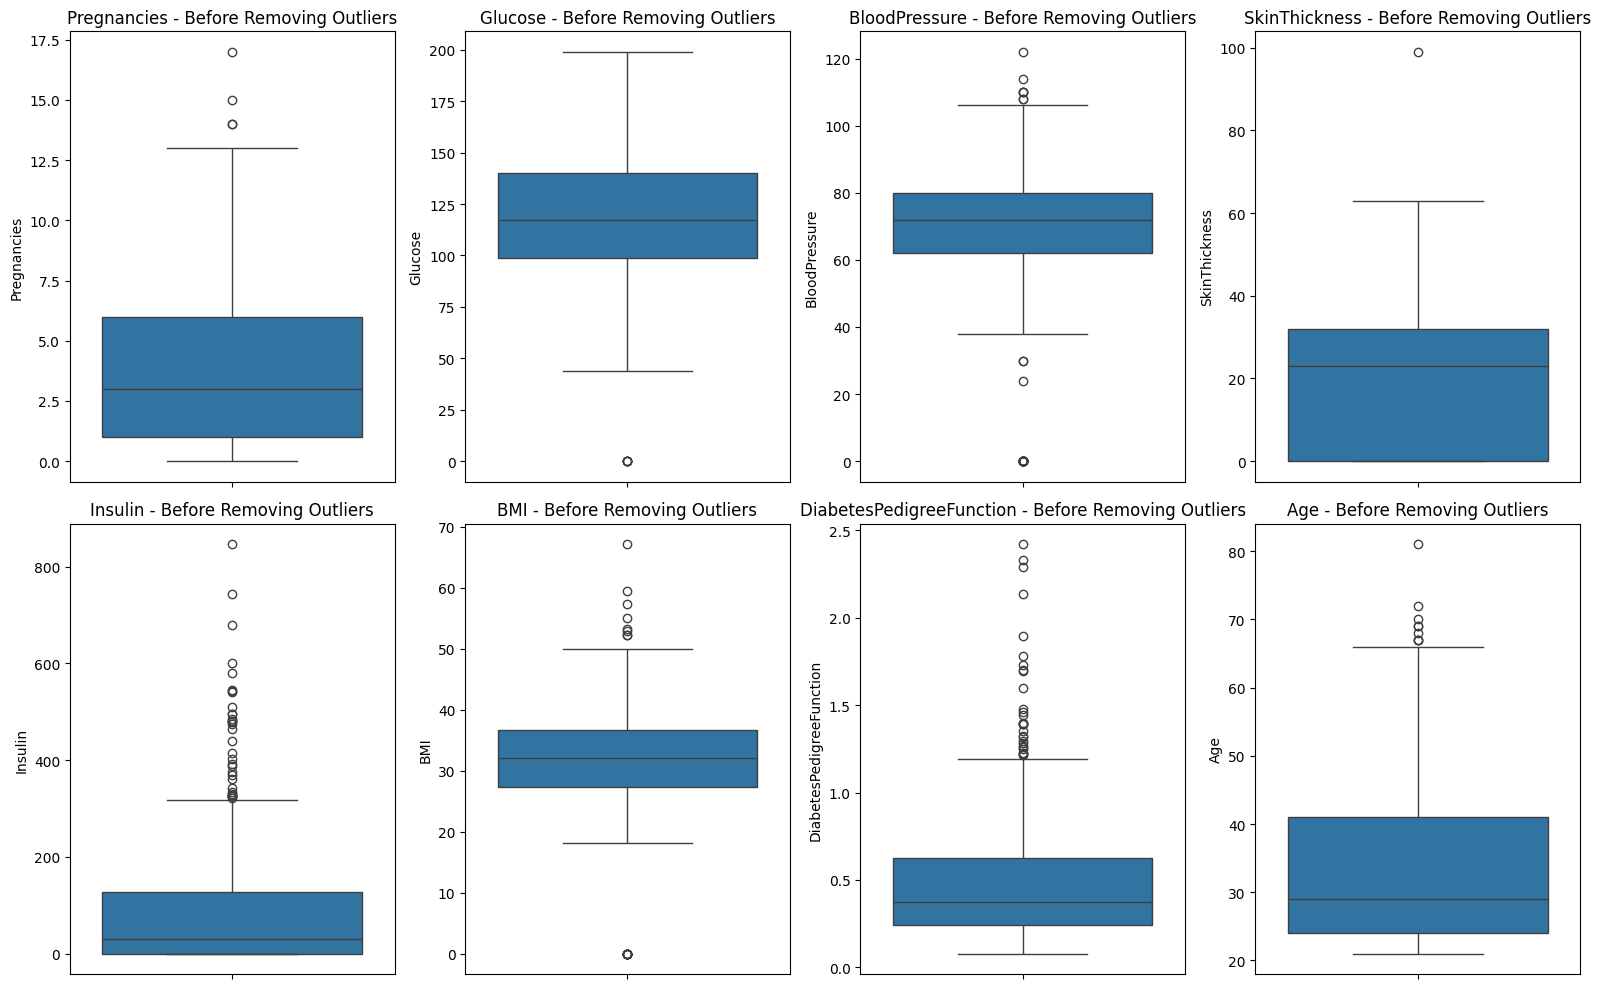

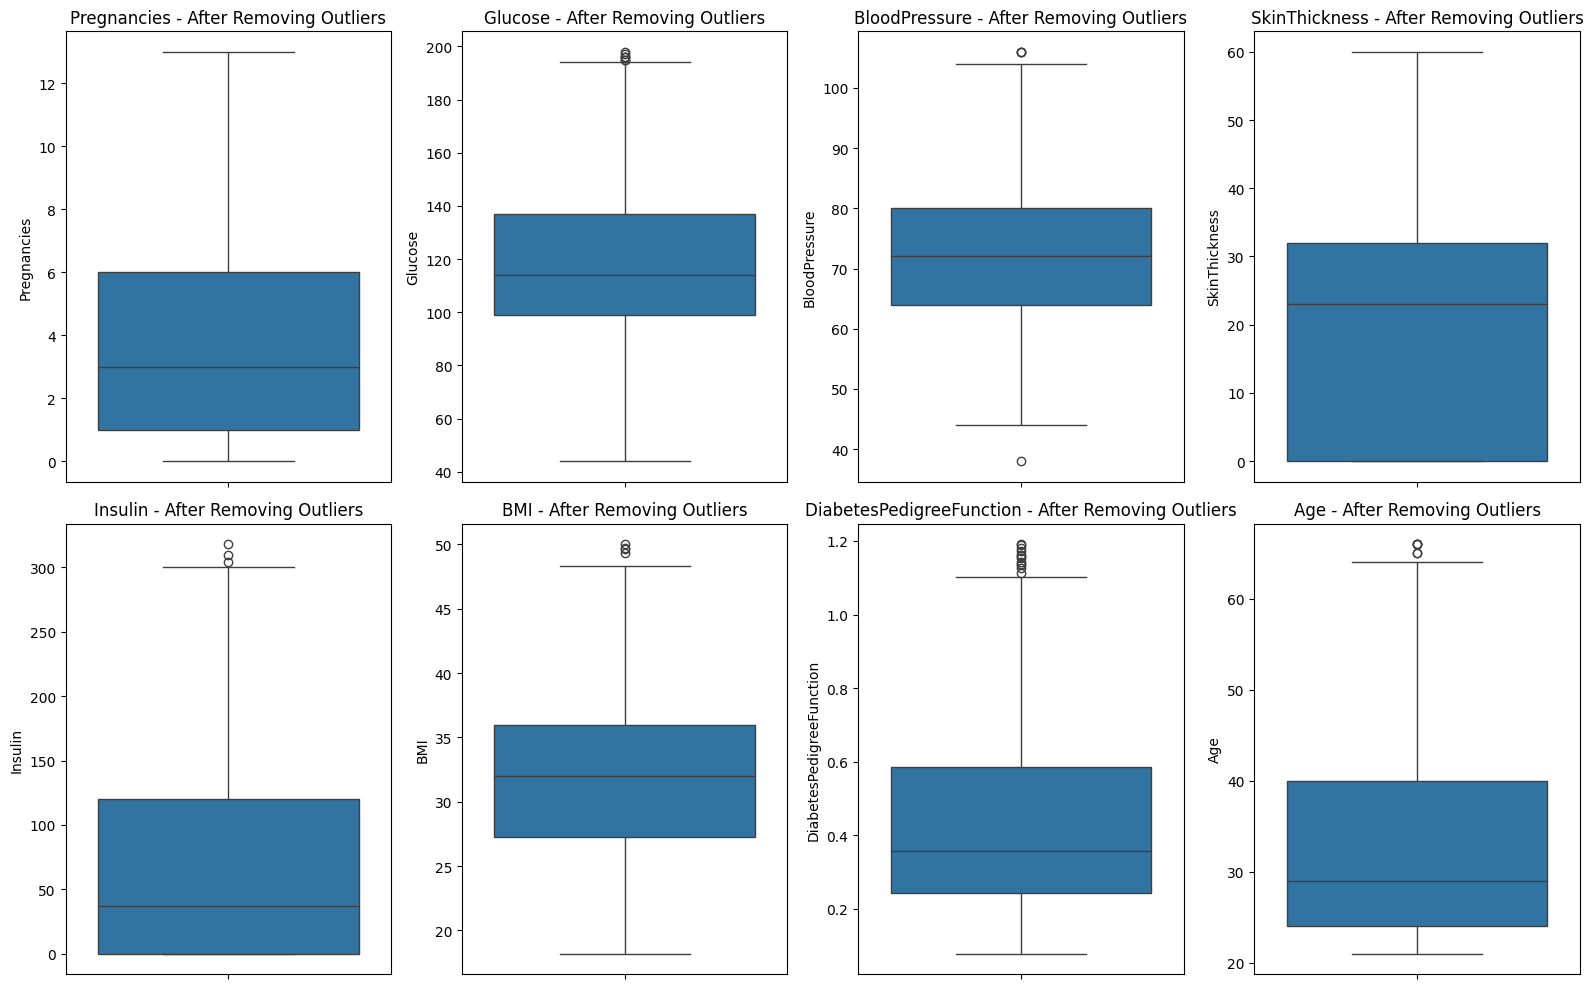

In [88]:
def create_box_plots(df, columns, title):
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(y=col, data=df)
        plt.title(f'{col} - {title}')
    plt.tight_layout()
    plt.show()


create_box_plots(df, columns, "Before Removing Outliers")
create_box_plots(df_cleaned, columns, "After Removing Outliers")


In [89]:
df=df_cleaned.copy()
target_columns = ['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


for col in target_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
        print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")

Number of outliers in BloodPressure: 4
Number of outliers in Insulin: 3
Number of outliers in DiabetesPedigreeFunction: 12
Number of outliers in Age: 6


In [90]:

outlier_columns = [col + '_outlier' for col in target_columns if col + '_outlier' in df.columns]
df_cleaned = df[~df[outlier_columns].any(axis=1)]


df_cleaned = df_cleaned.drop(columns=outlier_columns)


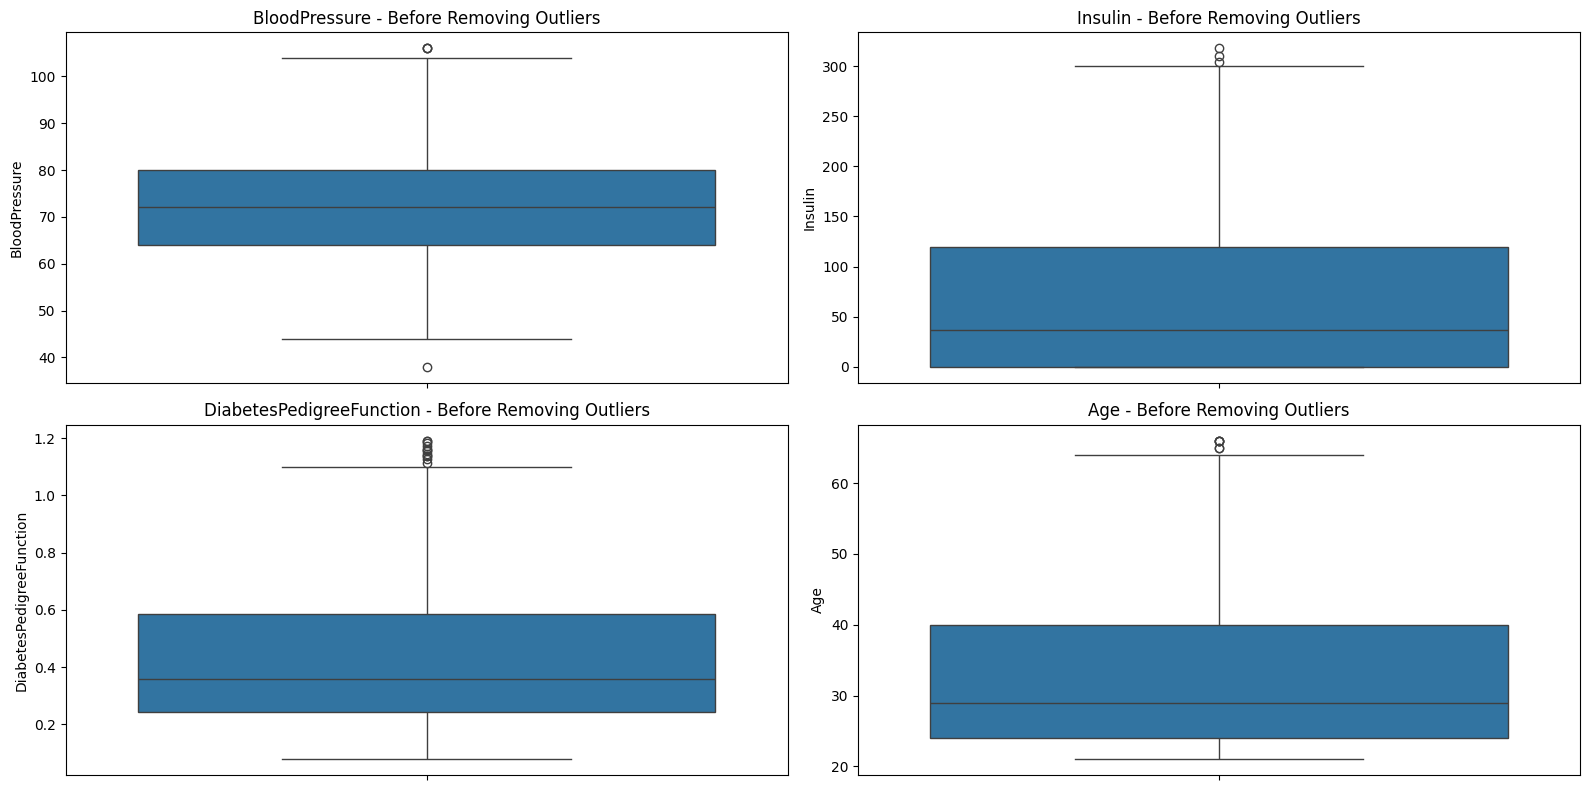

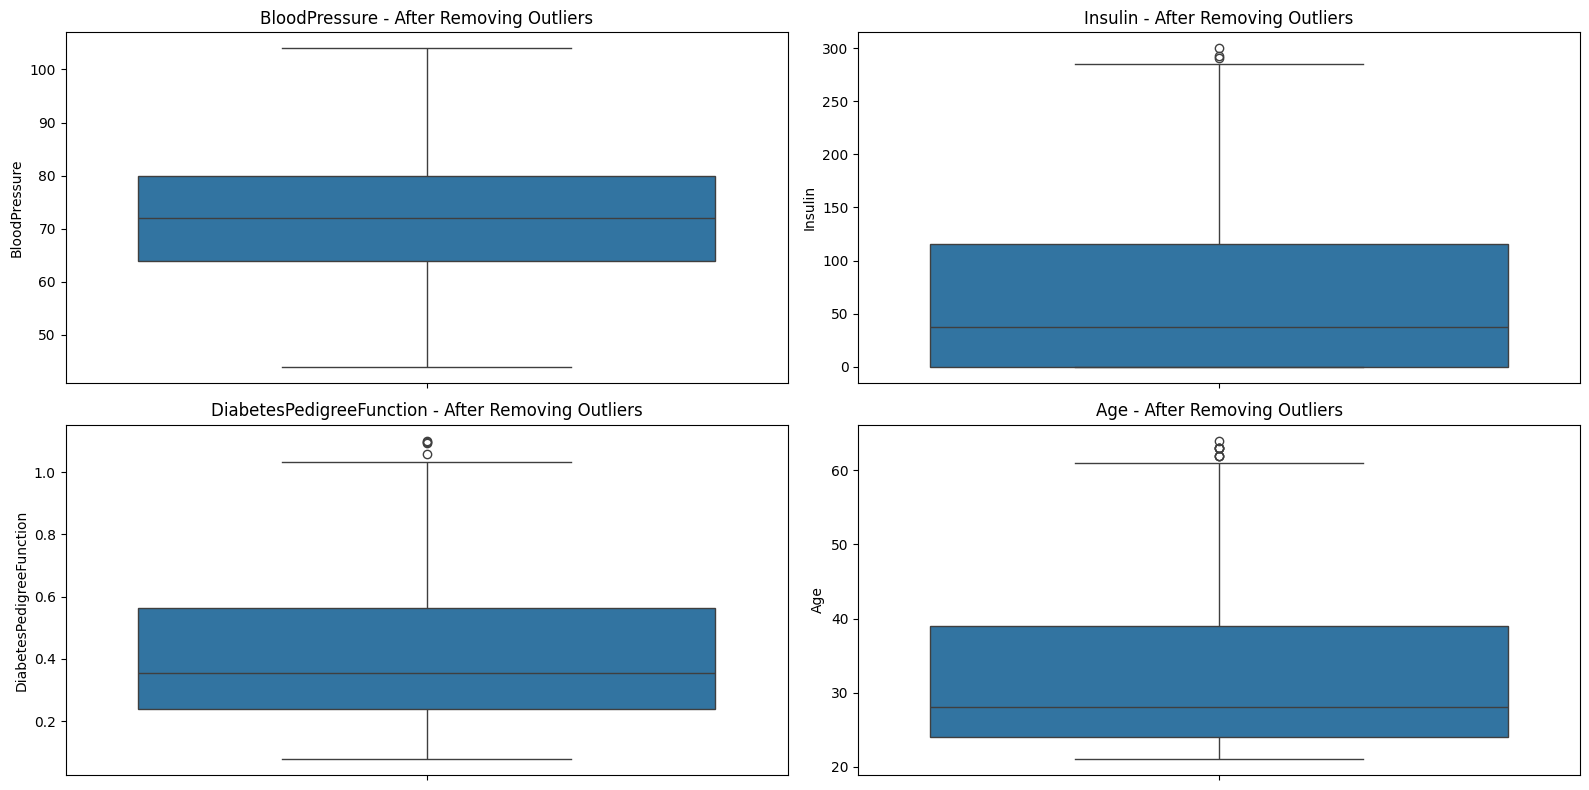

Number of rows after removing outliers: 614


In [92]:

def create_box_plots(df, columns, title):
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=col, data=df)
        plt.title(f'{col} - {title}')
    plt.tight_layout()
    plt.show()


create_box_plots(df, target_columns, "Before Removing Outliers")
create_box_plots(df_cleaned, target_columns, "After Removing Outliers")
print("Number of rows after removing outliers:", df_cleaned.shape[0])

In [93]:
df_new=df_cleaned.copy()
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
df_new['Outcome'].value_counts()

,count
Outcome,
0,427
1,187


In [103]:
from imblearn.over_sampling import SMOTE


X = df_new.drop('Outcome', axis=1)
y = df_new['Outcome']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Outcome'] = y_resampled

print("Class distribution after resampling:")
print(df_resampled['Outcome'].value_counts())


Class distribution after resampling:
Outcome
1    427
0    427
Name: count, dtype: int64


In [104]:
df=df_resampled.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,5,116,74,0,0,25.600000,0.201000,30,0
...,...,...,...,...,...,...,...,...,...
849,4,115,74,29,0,32.233745,0.616177,34,1
850,6,104,72,37,213,38.127358,0.702899,40,1
851,0,177,89,26,0,43.177495,0.696057,23,1
852,0,197,67,32,271,40.816266,0.539590,28,1


In [97]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        88
           1       0.69      0.73      0.71        83

    accuracy                           0.71       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.71      0.71      0.71       171

Confusion Matrix:
 [[61 27]
 [22 61]]


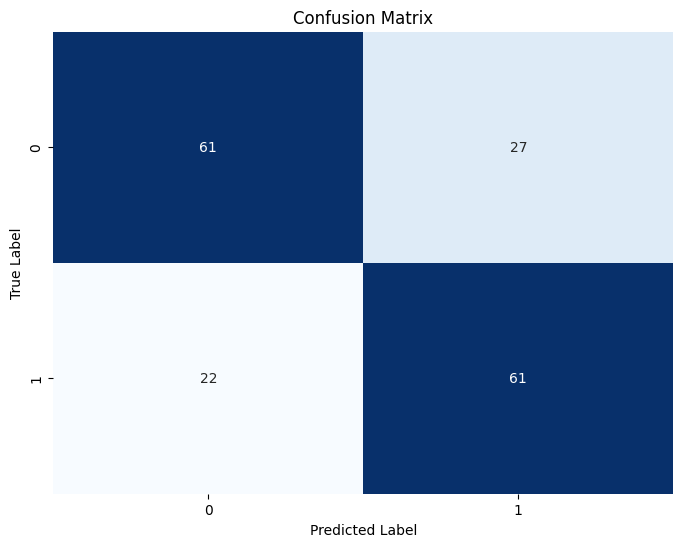

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

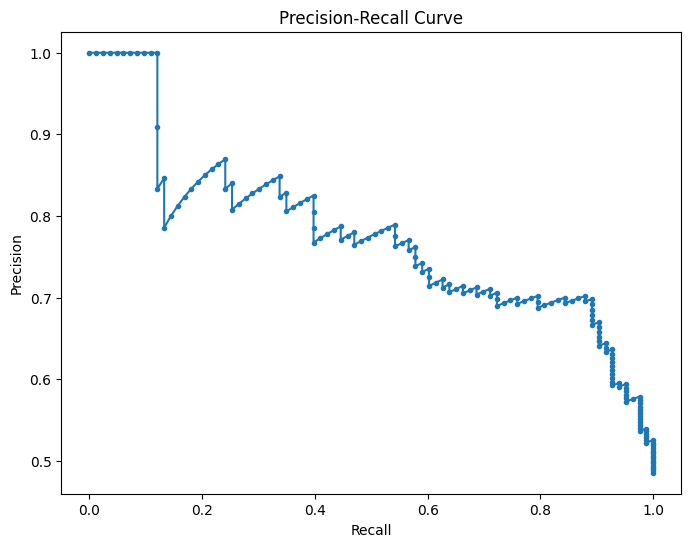

In [100]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Normalized Confusion Matrix:
 [[0.69318182 0.30681818]
 [0.26506024 0.73493976]]


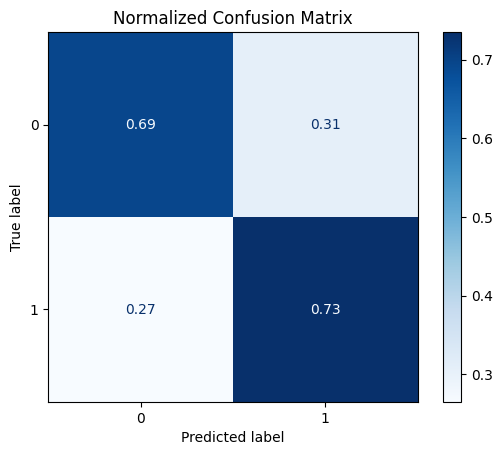

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute normalized confusion matrix
confusion_matrix_normalized = confusion_matrix(y_test, y_pred, normalize='true')
print("Normalized Confusion Matrix:\n", confusion_matrix_normalized)

ConfusionMatrixDisplay(confusion_matrix_normalized, display_labels=svm_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()


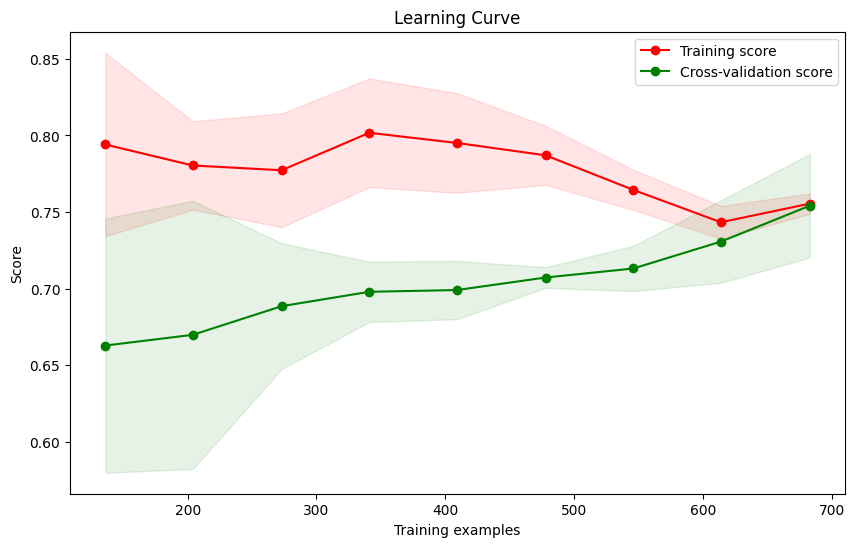

In [102]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_scaled, y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()
